In [1]:
# ========== Part 1: Dataset Information (Structured 3D) ==========
import numpy as np
import os
import matplotlib.pyplot as plt

# Set data path
data_root = '/Path/to/your/data'  # Modify to your data path

# Load metadata
metadata = np.load(os.path.join(data_root, 'data.npz'), allow_pickle=True)

# Extract information
variables = metadata['variables']
times = metadata['times']
train_groups = metadata['train_groups']
val_groups = metadata['val_groups']
test_groups = metadata['test_groups']
spatial_size = metadata['spatial_size']
coords = metadata['coords']

# Aggregate all cases
all_groups = {
    'train': train_groups.tolist(),
    'val': val_groups.tolist(),
    'test': test_groups.tolist()
}

# Display dataset information
print("=" * 60)
print("Dataset Information Overview (Structured 3D)")
print("=" * 60)
print(f"\nSpatial Resolution: {spatial_size} (X, Y, Z)")

print(f"\nCoordinate Information:")
print(f"  X: Range [{coords[0].min():.4f}, {coords[0].max():.4f}]")
print(f"     Grid points: {spatial_size[0]}")
print(f"     Index range: [0, {spatial_size[0]-1}]")

print(f"\n  Y: Range [{coords[1].min():.4f}, {coords[1].max():.4f}]")
print(f"     Grid points: {spatial_size[1]}")
print(f"     Index range: [0, {spatial_size[1]-1}]")

print(f"\n  Z: Range [{coords[2].min():.4f}, {coords[2].max():.4f}]")
print(f"     Grid points: {spatial_size[2]}")
print(f"     Index range: [0, {spatial_size[2]-1}]")

print(f"\nNumber of Time Steps: {len(times)}")
print(f"Time Steps List: {times[:5]}... (total {len(times)} steps)")

print(f"\nTotal Variables: {len(variables)}")
print("Variable List:")
for i, var in enumerate(variables):
    print(f"  [{i}] {var}")

print(f"\nTotal Cases: {len(train_groups) + len(val_groups) + len(test_groups)}")
print(f"  - Train cases: {len(train_groups)}")
print(f"  - Val cases: {len(val_groups)}")
print(f"  - Test cases: {len(test_groups)}")

print("\nAll Case Names:")
for split, groups in all_groups.items():
    print(f"\n  [{split.upper()}] ({len(groups)} cases):")
    for i, group in enumerate(groups):
        print(f"    [{i}] {group}")

print("\n" + "=" * 60)
print("\nIMPORTANT NOTES FOR SLICING:")
print("  - Choose slice_direction from: 'x', 'y', 'z'")
print("  - Set slice_index to select grid point index")
print("  - Use the index ranges shown above")
print("=" * 60)

Dataset Information Overview (Structured 3D)

Spatial Resolution: [128 128 128] (X, Y, Z)

Coordinate Information:
  X: Range [0.0000, 0.0063]
     Grid points: 128
     Index range: [0, 127]

  Y: Range [0.0000, 0.0063]
     Grid points: 128
     Index range: [0, 127]

  Z: Range [0.0000, 0.0063]
     Grid points: 128
     Index range: [0, 127]

Number of Time Steps: 41
Time Steps List: ['0' '0.00001' '0.00002' '0.00003' '0.00004']... (total 41 steps)

Total Variables: 11
Variable List:
  [0] H.npy
  [1] H2.npy
  [2] H2O.npy
  [3] O.npy
  [4] O2.npy
  [5] OH.npy
  [6] T.npy
  [7] p.npy
  [8] Ux.npy
  [9] Uy.npy
  [10] Uz.npy

Total Cases: 16
  - Train cases: 12
  - Val cases: 2
  - Test cases: 2

All Case Names:

  [TRAIN] (12 cases):
    [0] U_16_1_5_256
    [1] U_32_2_256
    [2] U_4_1_256
    [3] U_4_1_5_256
    [4] U_8_1_5_256
    [5] U_32_1_256
    [6] U_16_2_256
    [7] U_8_2_256
    [8] U_4_2_256
    [9] U_32_2_5_256
    [10] U_8_2_5_256
    [11] U_4_2_5_256

  [VAL] (2 cases):

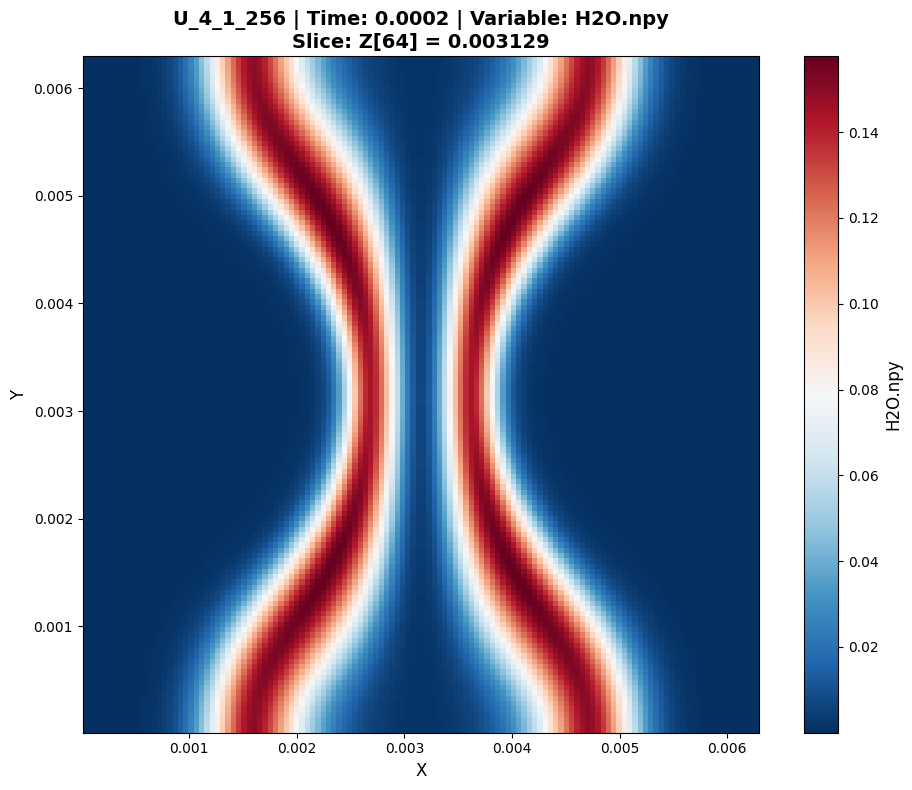


Slice Information:
  Direction: Z
  Slice index: 64 (out of 128 grid points)
  Coordinate value at index 64: 0.003129

Data Statistics:
  Shape: (128, 128)
  Min: 1.120961e-08
  Max: 1.576712e-01
  Mean: 3.598978e-02
  Std: 5.065923e-02


In [2]:
# ========== Part 2: Visualization Configuration and Plotting (Structured 3D) ==========

# -------------------- Configuration Section --------------------
# Modify the following parameters based on the information above

split_name = 'train'  # Options: 'train', 'val', 'test'
case_idx = 2          # Case index (select based on the indices shown above)
time_idx = 20          # Time step index (0 to len(times)-1)
var_idx = 2           # Variable index (select based on the variable list above)

# Slice configuration (using grid indices)
slice_direction = 'z'  # Options: 'x', 'y', 'z' (which axis to slice through)
slice_index = 64      # Grid index for the slice (use index range from Part 1)

# Visualization parameters
figsize = (10, 8)
cmap = 'RdBu_r'          # Color map: 'jet', 'viridis', 'RdBu_r', 'coolwarm', etc.
show_colorbar = True
save_fig = False      # Whether to save the figure
save_path = './visualization_structured_3d.png'  # Save path

# ---------------------------------------------------------------

# Load the corresponding case
if split_name == 'train':
    case_name = train_groups[case_idx]
    case_path = os.path.join(data_root, 'train', f'{case_name}.npz')
elif split_name == 'val':
    case_name = val_groups[case_idx]
    case_path = os.path.join(data_root, 'val', f'{case_name}.npz')
elif split_name == 'test':
    case_name = test_groups[case_idx]
    case_path = os.path.join(data_root, 'test', f'{case_name}.npz')
else:
    raise ValueError(f"Invalid split_name: {split_name}")

# Load data
case_data = np.load(case_path)
data = case_data['data']  # shape: (T, C, X, Y, Z)

# Extract data for specified time step and variable
field_data = data[time_idx, var_idx, :, :, :]  # (X, Y, Z)

# Extract coordinates
Cx = coords[0]  # (X, Y, Z)
Cy = coords[1]  # (X, Y, Z)
Cz = coords[2]  # (X, Y, Z)

# Slice the data based on direction and index
if slice_direction.lower() == 'x':
    # Validate index
    if slice_index < 0 or slice_index >= spatial_size[0]:
        raise ValueError(f"slice_index {slice_index} is out of range [0, {spatial_size[0]-1}]")

    # Extract slice: fix X at slice_index, vary Y and Z
    slice_data = field_data[slice_index, :, :]  # (Y, Z)
    coord1 = Cy[slice_index, :, :]  # Y coordinates
    coord2 = Cz[slice_index, :, :]  # Z coordinates
    xlabel, ylabel = 'Y', 'Z'
    axis_name = 'X'
    actual_coord = Cx[slice_index, 0, 0]

elif slice_direction.lower() == 'y':
    # Validate index
    if slice_index < 0 or slice_index >= spatial_size[1]:
        raise ValueError(f"slice_index {slice_index} is out of range [0, {spatial_size[1]-1}]")

    # Extract slice: fix Y at slice_index, vary X and Z
    slice_data = field_data[:, slice_index, :]  # (X, Z)
    coord1 = Cx[:, slice_index, :]  # X coordinates
    coord2 = Cz[:, slice_index, :]  # Z coordinates
    xlabel, ylabel = 'X', 'Z'
    axis_name = 'Y'
    actual_coord = Cy[0, slice_index, 0]

elif slice_direction.lower() == 'z':
    # Validate index
    if slice_index < 0 or slice_index >= spatial_size[2]:
        raise ValueError(f"slice_index {slice_index} is out of range [0, {spatial_size[2]-1}]")

    # Extract slice: fix Z at slice_index, vary X and Y
    slice_data = field_data[:, :, slice_index]  # (X, Y)
    coord1 = Cx[:, :, slice_index]  # X coordinates
    coord2 = Cy[:, :, slice_index]  # Y coordinates
    xlabel, ylabel = 'X', 'Y'
    axis_name = 'Z'
    actual_coord = Cz[0, 0, slice_index]

else:
    raise ValueError(f"Invalid slice_direction: {slice_direction}. Must be 'x', 'y', or 'z'")

# Visualization
fig, ax = plt.subplots(figsize=figsize)

im = ax.pcolormesh(coord1, coord2, slice_data, cmap=cmap, shading='auto')

if show_colorbar:
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(variables[var_idx], fontsize=12)

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
ax.set_title(f'{case_name} | Time: {times[time_idx]} | Variable: {variables[var_idx]}\n'
             f'Slice: {axis_name}[{slice_index}] = {actual_coord:.6f}',
             fontsize=14, fontweight='bold')
ax.set_aspect('equal')

plt.tight_layout()

if save_fig:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Figure saved to: {save_path}")

plt.show()

# Display data statistics
print(f"\nSlice Information:")
print(f"  Direction: {axis_name}")
print(f"  Slice index: {slice_index} (out of {spatial_size['xyz'.index(slice_direction.lower())]} grid points)")
print(f"  Coordinate value at index {slice_index}: {actual_coord:.6f}")

print(f"\nData Statistics:")
print(f"  Shape: {slice_data.shape}")
print(f"  Min: {slice_data.min():.6e}")
print(f"  Max: {slice_data.max():.6e}")
print(f"  Mean: {slice_data.mean():.6e}")
print(f"  Std: {slice_data.std():.6e}")